### generate a synthetic dataset


In [1]:
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(42)

# Generate data for two clusters
mean_1 = [2, 3]
cov_1 = [[1, 0.5], [0.5, 1]]  # Covariance matrix for cluster 1

mean_2 = [8, 8]
cov_2 = [[1, -0.3], [-0.3, 1]]  # Covariance matrix for cluster 2

# Generate points
data_1 = np.random.multivariate_normal(mean_1, cov_1, 150)
data_2 = np.random.multivariate_normal(mean_2, cov_2, 150)

# Combine the data into a single dataset
data = np.vstack((data_1, data_2))

# Save the dataset to a CSV file
df = pd.DataFrame(data, columns=['x', 'y'])
df.to_csv('synthetic_data.csv', index=False)

print("Dataset generated and saved as 'synthetic_data.csv'")


Dataset generated and saved as 'synthetic_data.csv'


### Load the Dataset

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('synthetic_data.csv')
print(data.head())


          x         y
0  1.638965  2.500701
1  0.677570  3.200600
2  2.319851  3.085714
3  0.248644  2.016079
4  2.135297  3.677857


### Apply the EM Algorithm using a Gaussian Mixture Model

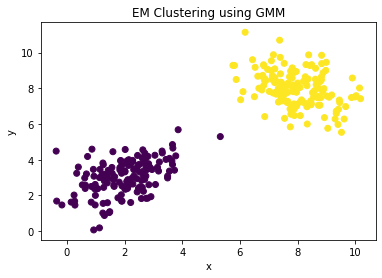

In [4]:
#We'll use the GaussianMixture class from the sklearn.mixture module to apply the EM algorithm.
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_data.csv')

# Convert the data to numpy array
X = data.values

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict the cluster for each data point
labels = gmm.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('EM Clustering using GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Analyzing the Gaussian Mixture Model

In [5]:
print("Means of the clusters:\n", gmm.means_)
print("Covariances of the clusters:\n", gmm.covariances_)
print("Weights of each Gaussian:\n", gmm.weights_)


Means of the clusters:
 [[2.01794373 3.04093116]
 [7.95705197 7.97719282]]
Covariances of the clusters:
 [[[ 0.9354123   0.4485924 ]
  [ 0.4485924   0.95992804]]

 [[ 0.89869926 -0.33498292]
  [-0.33498292  0.9779328 ]]]
Weights of each Gaussian:
 [0.49998898 0.50001102]
